### Тема “Обучение без учителя”

##### Задание 1
> 1. Импортируйте библиотеки pandas, numpy и matplotlib.
> 2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
> 3. Создайте датафреймы X и y из этих данных.
> 4. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
> 5. Масштабируйте данные с помощью StandardScaler.
> 6. Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
> 7. Постройте диаграмму рассеяния на этих данных.


##### Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

##### Создайте датафреймы X и y из этих данных.

In [3]:
ds = load_boston(); 

In [4]:
x = pd.DataFrame(ds.data, columns = ds.feature_names);
y = pd.DataFrame(ds.target, columns = ['target_price']);

##### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split;
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42);

##### Масштабируйте данные с помощью StandardScaler.

* Для начала посмотрим на признаки и надо ли их маштабировать.

In [6]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


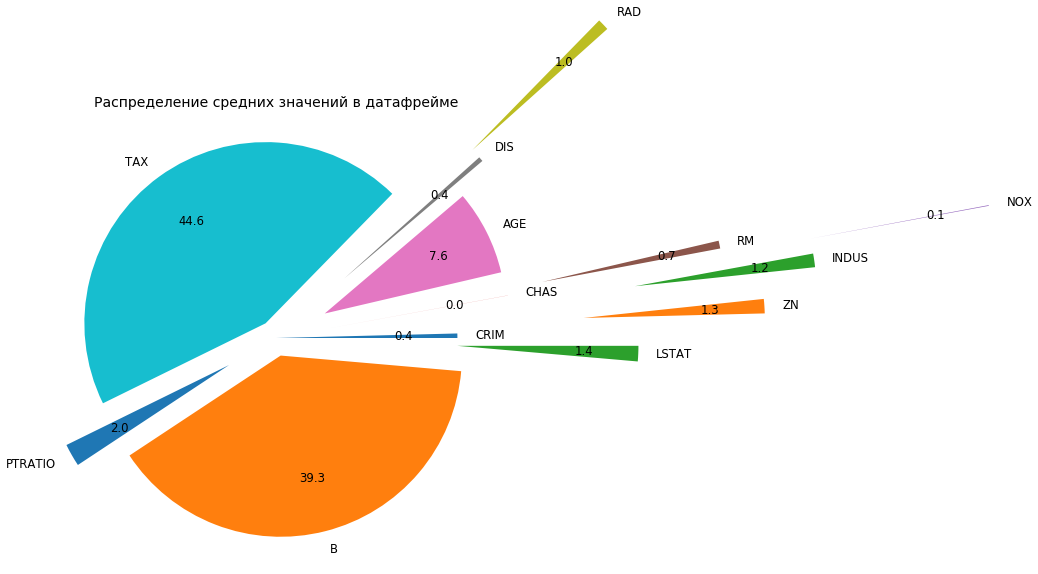

In [26]:

fig = plt.subplots(figsize = (15,10), dpi = 60);

plt.rcParams.update({'font.size': 14});

plt.title('Распределение средних значений в датафрейме');
plt.pie(X_train[X_train.columns.tolist()].mean(),
        autopct='%.1f', radius = 1, 
        wedgeprops = {'linewidth': 1}, 
        shadow = False,
        pctdistance = .7,
        labels = X_train.columns.tolist(),
        explode = (0, 1.7, 2, 0.3, 3, 1.5, 0.3, 0.5, 1.5, 0.1, 0.3, .1, 1)
       );
#plt.legend(loc = 'best', labels = X_train.columns.tolist());


* Как мы видим признаки имеют достаточно большой разброс и требуют маштабирование. 
* Например B и NOX.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

X_train_scale = pd.DataFrame(X_train_scale, columns = ds.feature_names)
X_test_scale = pd.DataFrame(X_test_scale, columns = ds.feature_names)

##### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [10]:
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

* Обучим нашу модель

In [11]:
X_train_scale_tsne = model_tsne.fit_transform(X_train_scale);

##### Постройте диаграмму рассеяния на этих данных.

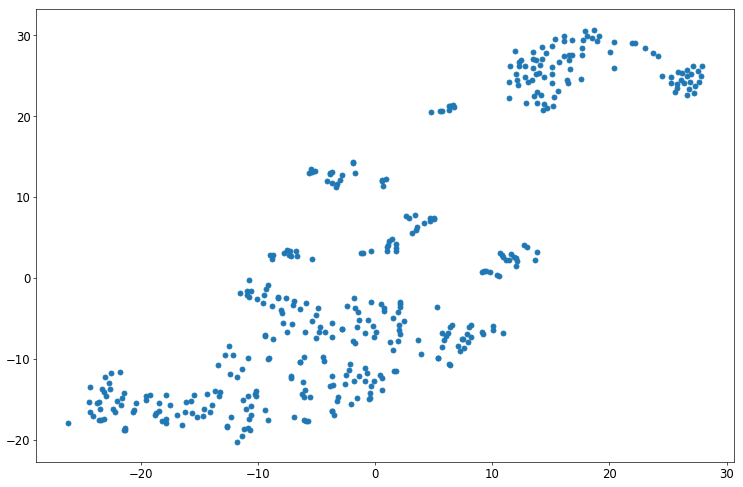

In [24]:
fig = plt.subplots(figsize = (15,10), dpi = 60);
plt.scatter(X_train_scale_tsne[:,0],X_train_scale_tsne[:,1]);

### Задание 2
> 1. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
> 2. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
> 3. Вычислите средние значения price и CRIM в разных кластерах.


##### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

In [13]:
# Импортируем модуль
from sklearn.cluster import KMeans

# Зададим разбиение на 3 кластера
model_km = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

##### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

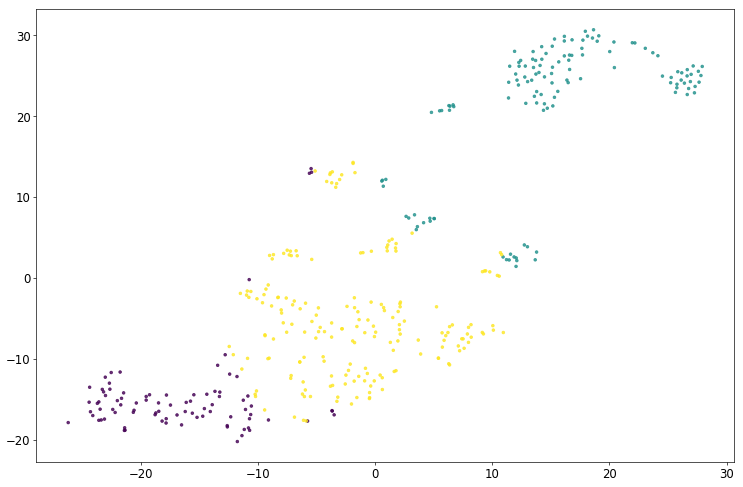

In [25]:
# Обучим модель
k_train = model_km.fit_predict(X_train_scale)

# Построим график
fig,ax = plt.subplots(figsize = (15,10), dpi = 60)
plt.scatter(X_train_scale_tsne[:,0],X_train_scale_tsne[:,1],c = k_train, alpha = 0.8, s = 10 );

##### Вычислите средние значения price и CRIM в разных кластерах.

In [15]:
x = [X_train.loc[k_train == 0, 'CRIM'].mean(), 
     X_train.loc[k_train == 1, 'CRIM'].mean(), 
     X_train.loc[k_train == 2, 'CRIM'].mean()]

y = [y_train[k_train == 0].mean()[0], 
     y_train[k_train == 1].mean()[0], 
     y_train[k_train == 2].mean()[0]]

for i in range(3):
    print('\ncluster {}: price = {}, crim = {}'.format(i, y[i], x[i]))



cluster 0: price = 27.788372093023252, crim = 0.07356558139534886

cluster 1: price = 16.165354330708666, crim = 10.797028425196853

cluster 2: price = 24.958115183246072, crim = 0.42166020942408367


### * Задание 3
> 1. Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
> 2. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


##### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [16]:
k_test = model_km.predict(X_test_scale)

##### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [17]:
x = [X_test.loc[k_test == 0, 'CRIM'].mean(), 
     X_test.loc[k_test == 1, 'CRIM'].mean(), 
     X_test.loc[k_test == 2, 'CRIM'].mean()]

y = [y_test[k_test == 0].mean()[0], 
     y_test[k_test == 1].mean()[0], 
     y_test[k_test == 2].mean()[0]]

for i in range(3):
    print('\ncluster {}: price = {}, crim = {}'.format(i, y[i], x[i]))


cluster 0: price = 31.35, crim = 0.062060000000000004

cluster 1: price = 16.437142857142856, crim = 10.165531142857143

cluster 2: price = 21.860784313725492, crim = 0.26607882352941176
